In [1]:
import pandas as pd

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

import PIL

from tempfile import TemporaryFile
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt



In [2]:
import cv2
import os
import argparse

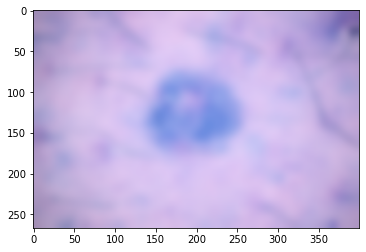

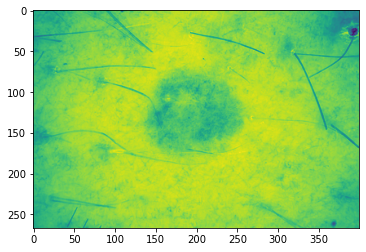

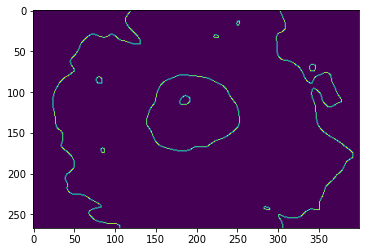

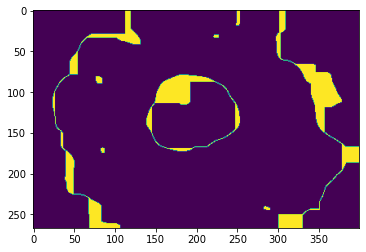

283 240 291 245
83 168 88 175
77 81 85 90
139 79 254 173
221 30 228 34
298 0 400 267
249 0 254 19
24 0 132 267


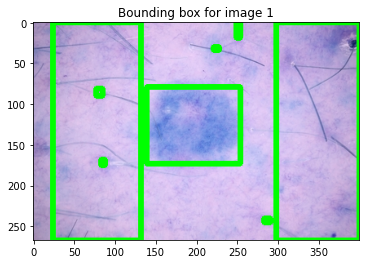

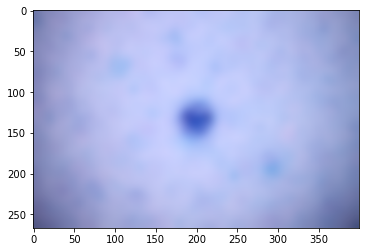

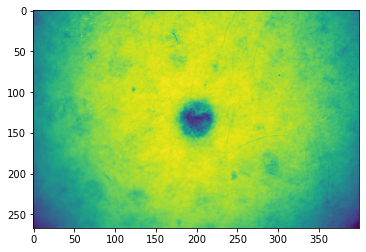

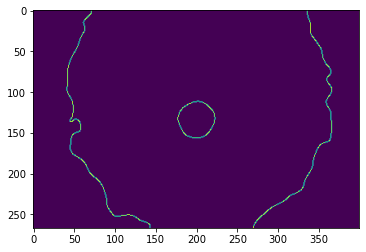

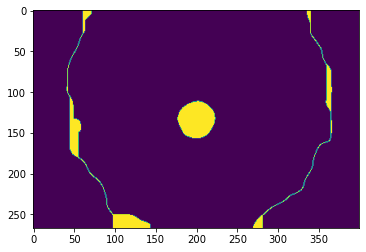

177 111 224 157
270 0 367 267
41 0 144 267


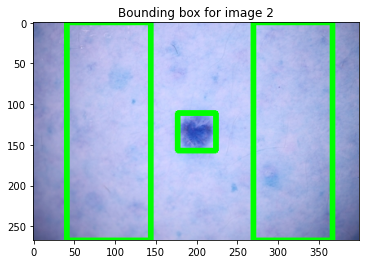

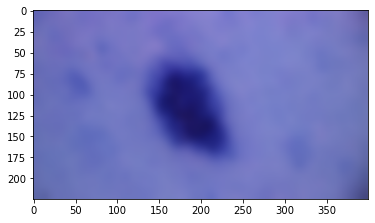

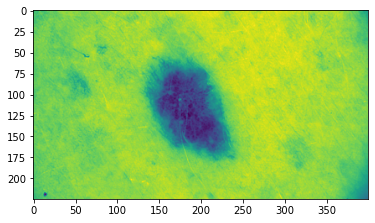

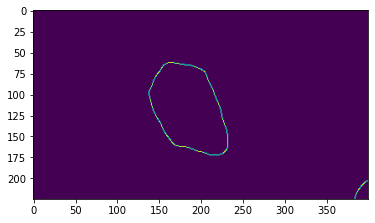

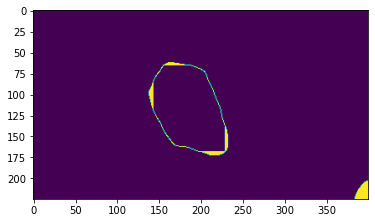

384 203 400 225
138 62 233 173


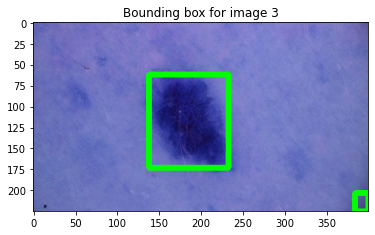

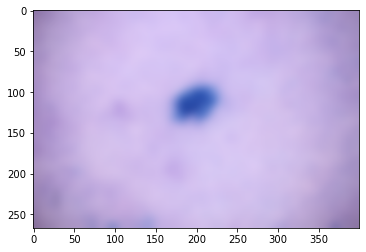

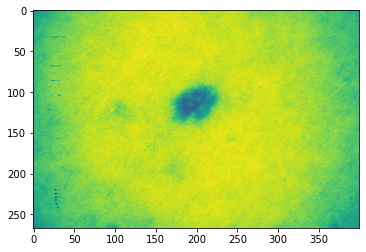

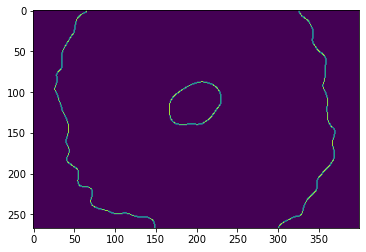

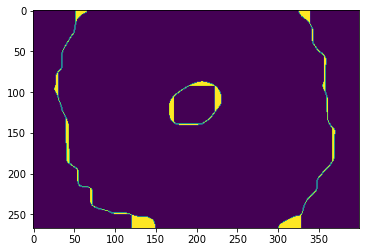

167 87 231 141
301 0 371 267
26 0 150 267


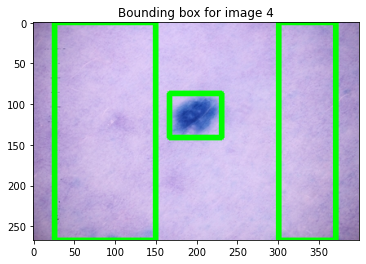

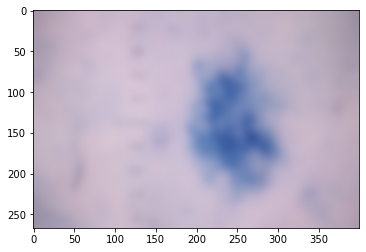

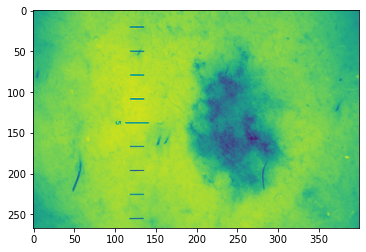

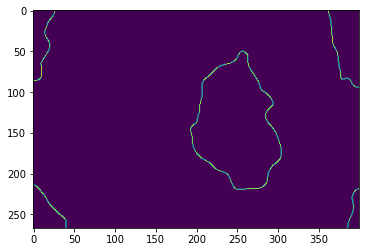

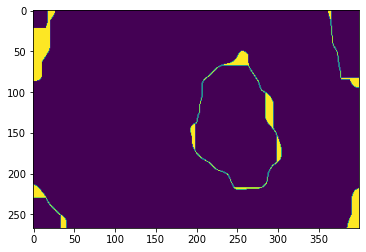

385 218 400 267
0 213 41 267
193 50 305 220
362 0 400 95
0 0 27 87


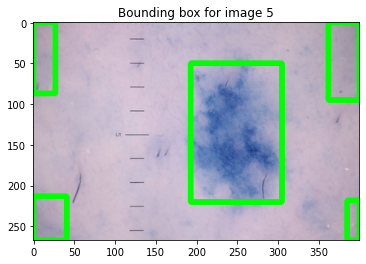

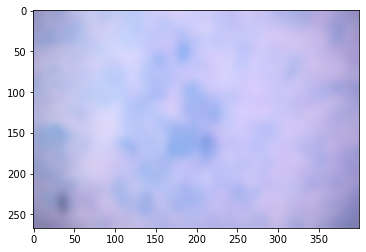

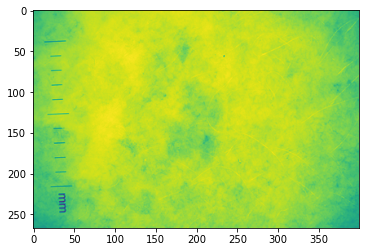

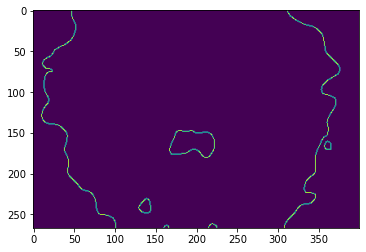

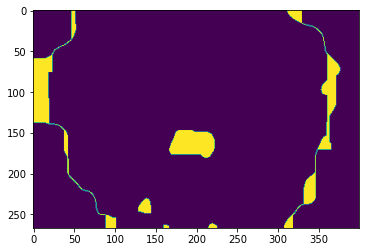

160 263 167 267
215 261 226 267
129 230 145 249
167 147 223 181
308 0 377 267
0 0 102 267


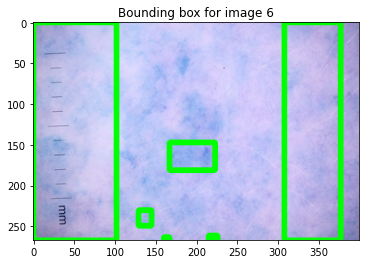

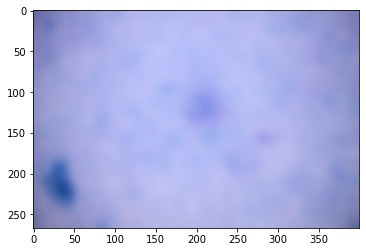

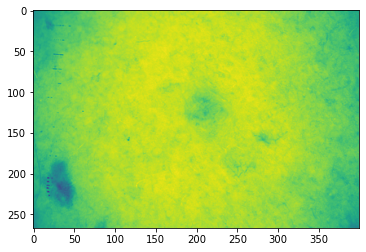

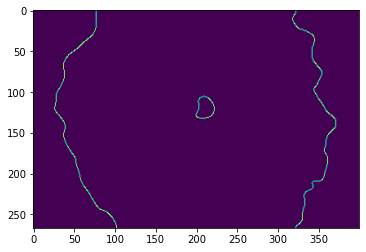

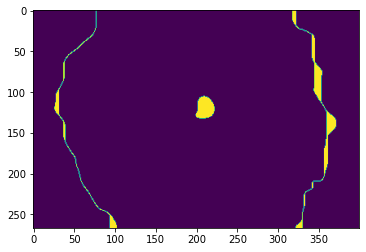

199 105 223 133
318 0 372 267
26 0 103 267


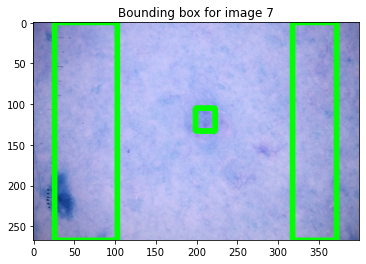

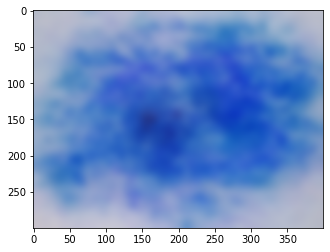

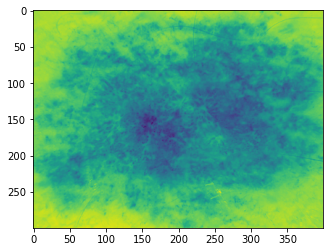

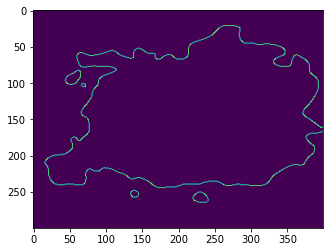

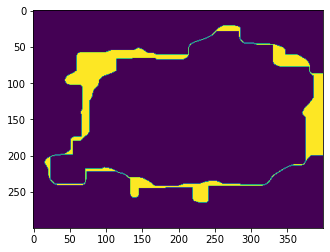

16 21 400 265


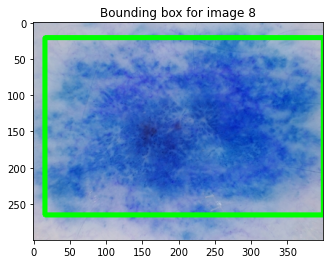

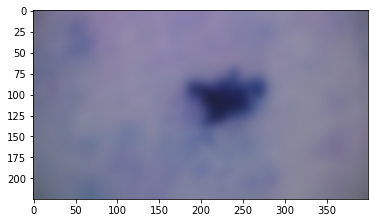

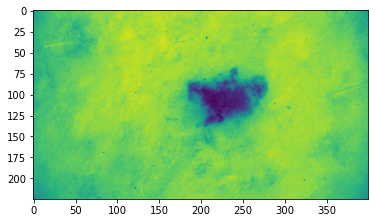

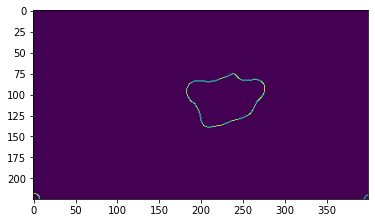

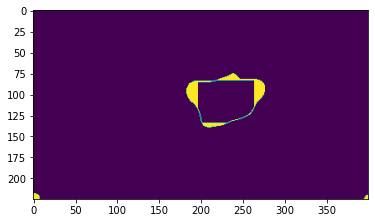

395 220 400 225
0 218 8 225
183 75 277 140


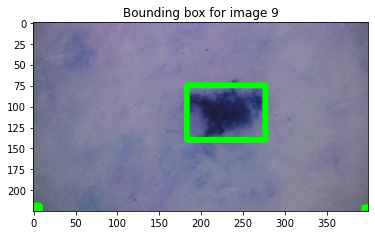

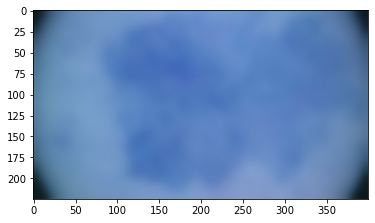

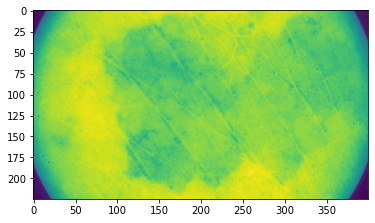

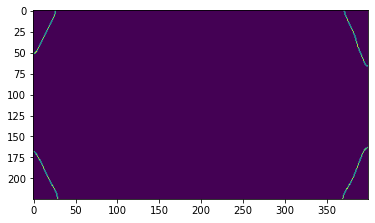

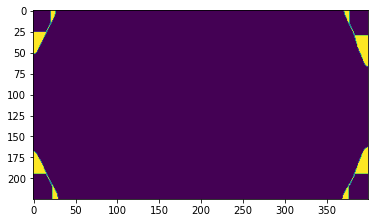

0 168 30 225
369 163 400 225
371 0 400 67
0 0 27 52


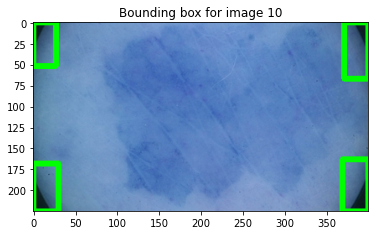

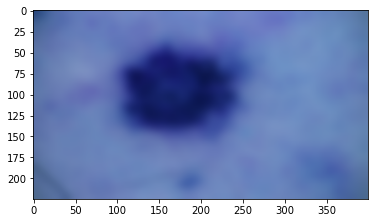

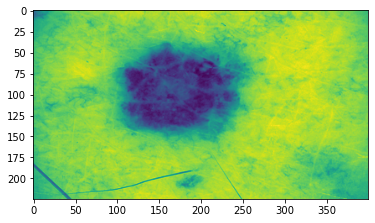

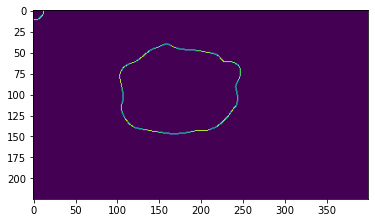

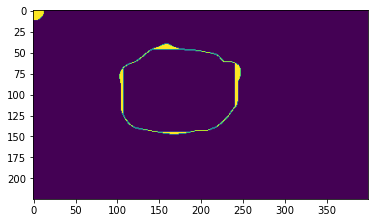

103 40 248 148
0 0 13 12


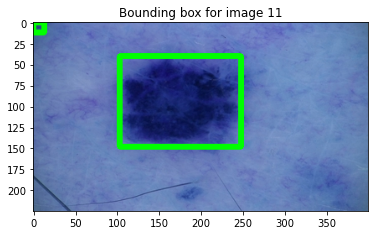

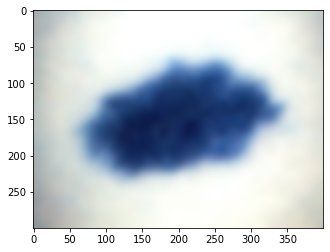

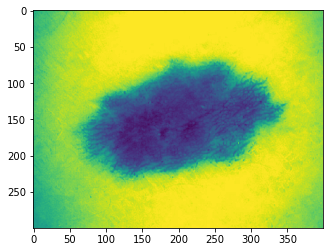

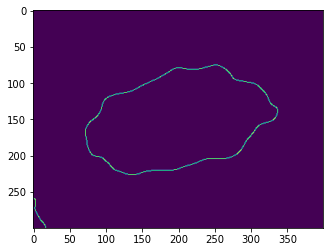

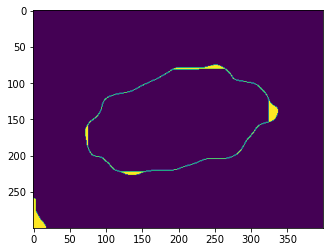

0 258 18 300
72 75 338 227


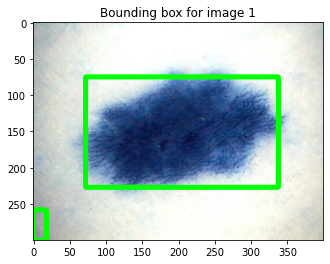

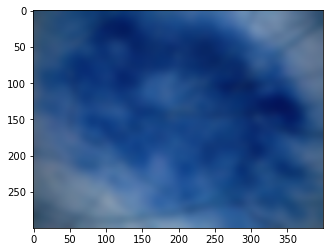

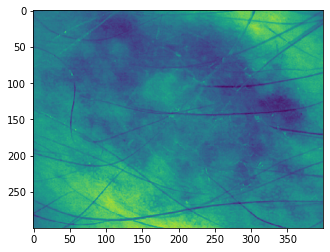

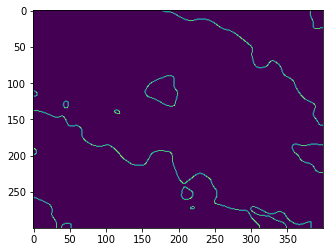

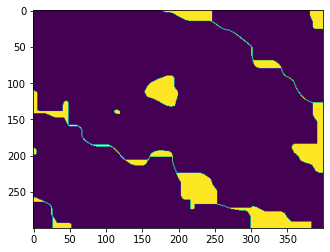

0 257 53 300
0 189 5 199
112 137 120 143
0 110 384 300
154 90 200 133
382 0 400 26
178 0 400 224


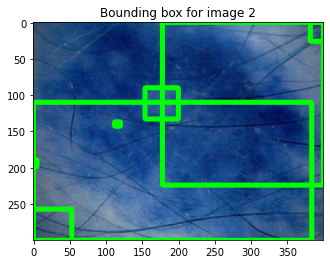

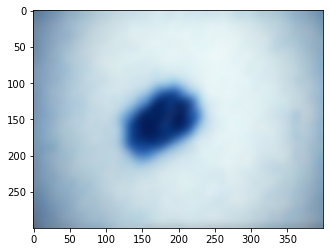

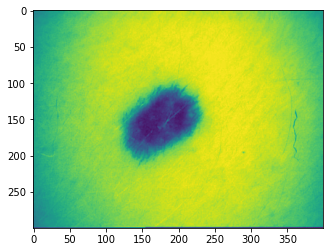

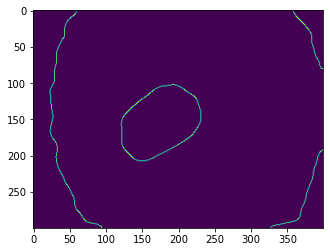

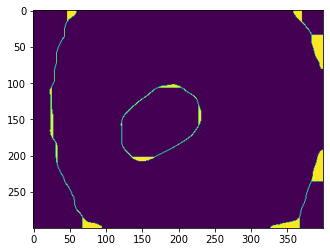

327 192 400 300
121 102 232 208
359 0 400 81
23 0 95 300


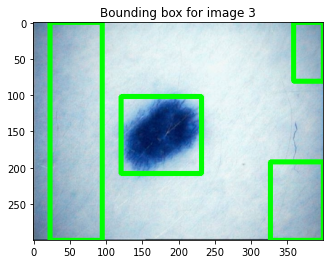

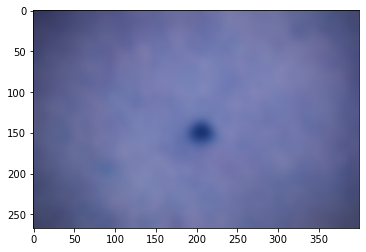

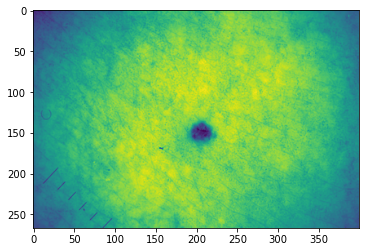

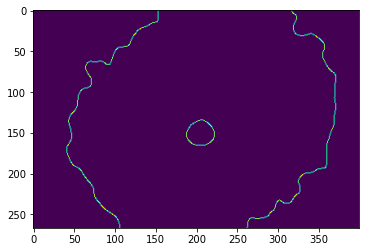

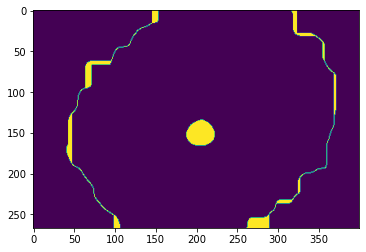

188 134 223 166
262 0 372 267
41 0 154 267


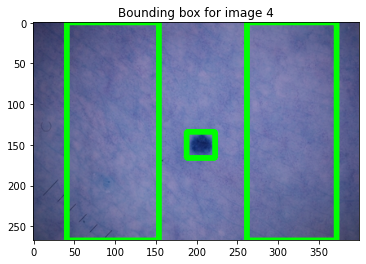

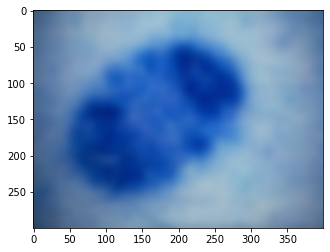

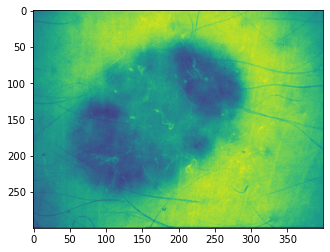

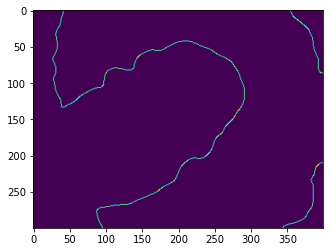

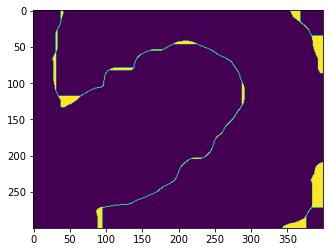

344 209 400 300
355 0 400 87
27 0 292 300


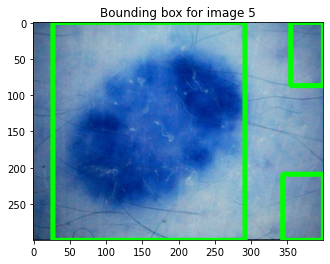

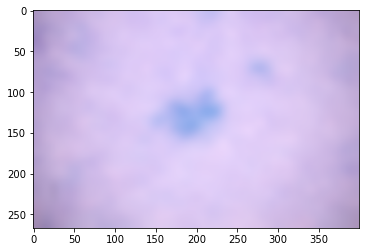

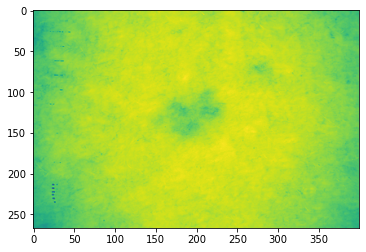

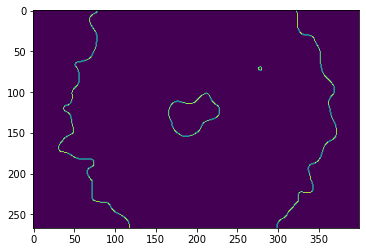

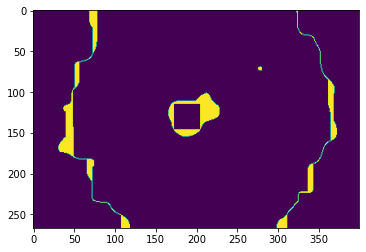

166 101 229 155
276 69 281 74
299 0 373 267
31 0 119 267


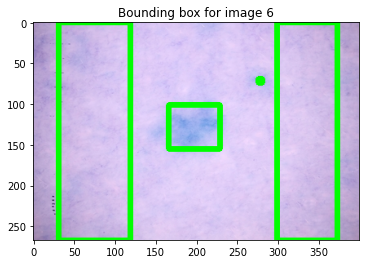

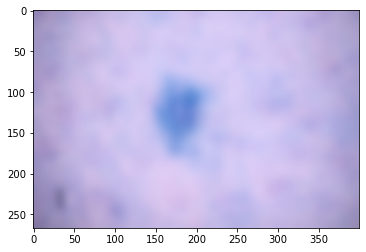

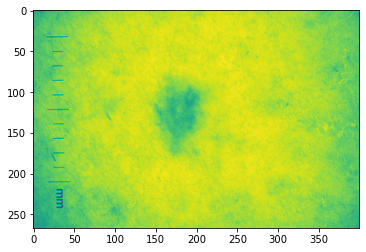

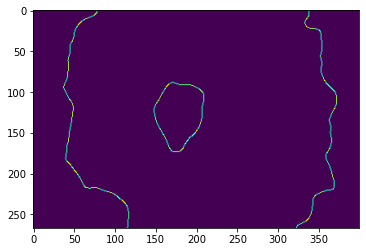

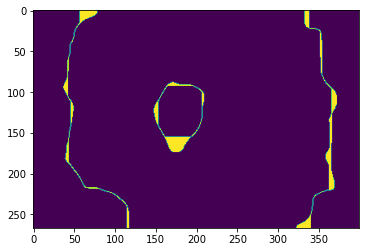

148 88 210 174
323 0 373 267
37 0 118 267


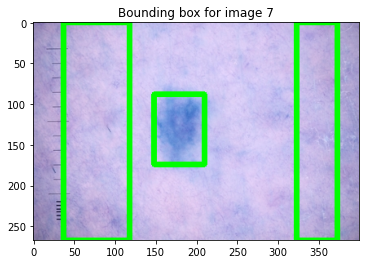

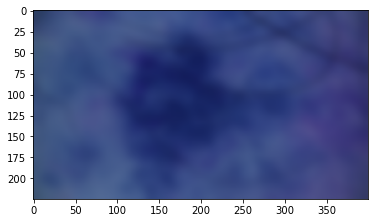

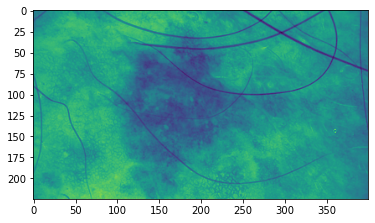

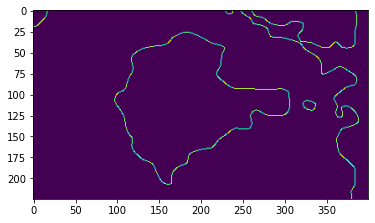

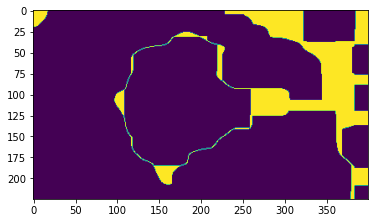

97 0 400 225
0 0 18 20


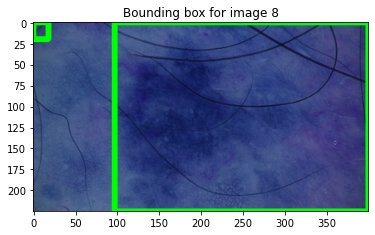

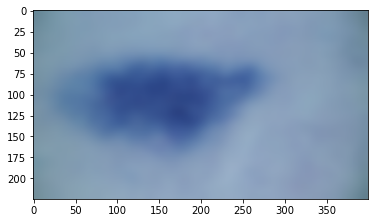

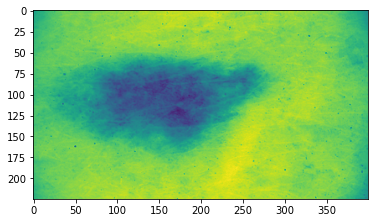

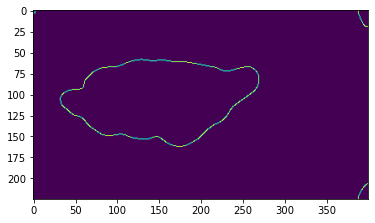

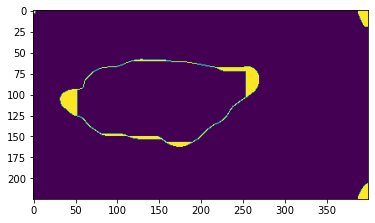

388 206 400 225
32 58 270 163
388 0 400 20
0 0 3 4


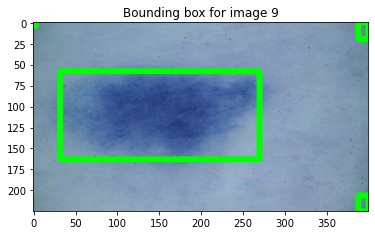

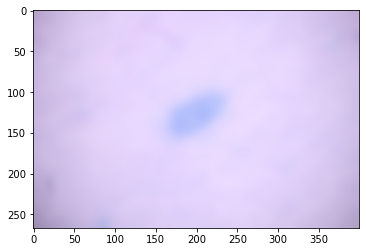

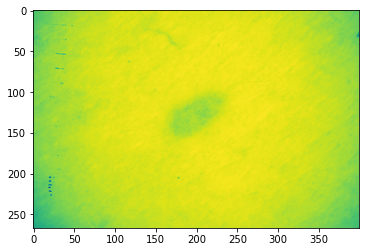

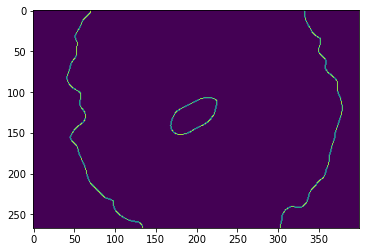

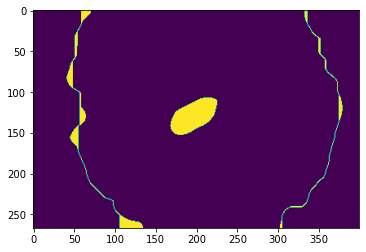

168 107 226 153
303 0 380 267
41 0 135 267


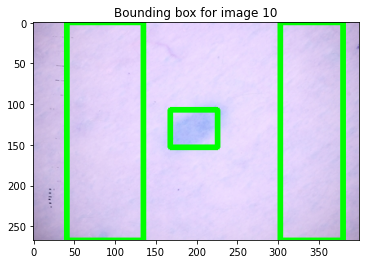

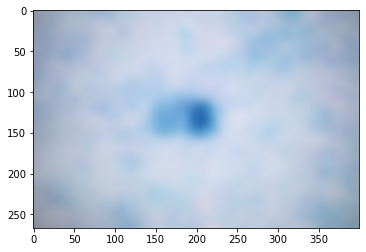

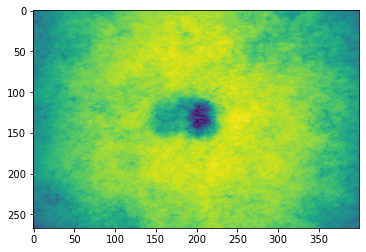

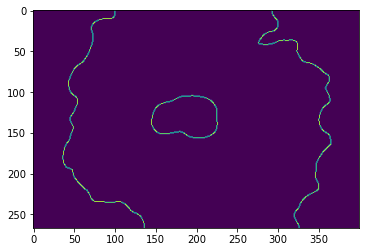

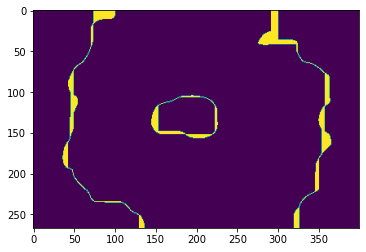

145 104 227 157
276 0 366 267
36 0 137 267


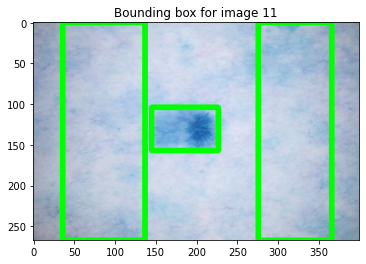

In [4]:
original_path = "/home/leslie/code/melanoma_files_small/jpeg/"
# save_saliency_path = "/home/leslie/code/melanoma_files_small/saliency/"
categories = ['train', 'test']
margin = 0
kernel_size = 31
percentage_of_area = 0

# go into "train" or "test" folder
for category in categories:
    img_index = 0
    num_images = 10 #how many images we want to view/apply saliency to
    path = os.path.join(original_path, category)
    
    # loop over images in the folder
    for saved_img in os.listdir(path):
        if img_index <= num_images:
            img_index += 1

            image_file = os.path.join(path,saved_img)
 
            
            # load and show the original image
            img = cv2.imread(image_file, 0) #0
            orig_img = cv2.imread(image_file) #0
            blurred = cv2.GaussianBlur(orig_img,(31,31),0)
            plt.imshow(blurred)
            plt.show()
#             img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            plt.imshow(img)
            plt.show()
            
            
            
#             _, image = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV) # other options include THRESH_BINARY, etc.
            img = cv2.GaussianBlur(img,(31,31),0)
            

            high_thresh, image = cv2.threshold(img,0, 255, cv2.THRESH_OTSU)
            low_thresh = 0.5*high_thresh

            edged = cv2.Canny(image, low_thresh, high_thresh)
            plt.imshow(edged)
            plt.show()

            #applying closing function 
            kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
            closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
            plt.imshow(closed)
            plt.show()
        
            #finding_contours of salient regions
            (cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            img_area = img.shape[0]*img.shape[1] #area of contour shapes
#             margin = img_area // 2000 

            # going over contours
            for c in cnts:
                x,y,w,h = cv2.boundingRect(c)

                if (w*h)/img_area > percentage_of_area: 
                    # changing y and x to crop image
                    y_from = y - margin if y - margin > 0 else y
                    y_to = y + h + margin if y + h + margin < img.shape[0] else y + h
                    x_from = x - margin if x - margin > 0 else x
                    x_to = x + w + margin if x + w + margin < img.shape[1] else x + w
                    
                    print(x_from, y_from, x_to, y_to)
                    start_point = (x_from, y_from)
                    end_point = (x_to, y_to)
                    color = (0, 255,0)
                    thickness = 5
                    
                    orig_img = cv2.rectangle(orig_img, start_point, end_point, color, thickness)
            plt.title("Bounding box for image " + str(img_index))
            plt.imshow(orig_img)
            plt.show()

        else:
            break